In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

In [2]:
#data frame creation for movies, users and ratings files
movies = pd.read_csv("/Users/kavyasree/Downloads/datascience/movies.dat", sep="::", names=['MovieID', 'Title', 'Genres'] )


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.isna()

,MovieID,Title,Genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3878,False,False,False
3879,False,False,False
3880,False,False,False
3881,False,False,False


In [5]:
movies.dropna(inplace=True)

In [6]:
ratings = pd.read_csv("/Users/kavyasree/Downloads/datascience/ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'] )

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
ratings.dropna(inplace=True)

In [9]:
users = pd.read_csv("/Users/kavyasree/Downloads/datascience/users.dat", sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] )


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [10]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
users.dropna(inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

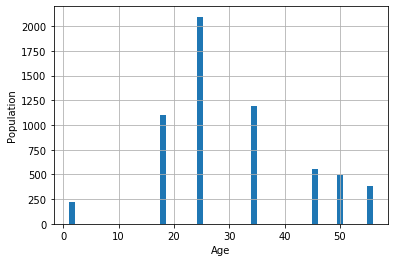

In [12]:
#User Age distribution using histogram
users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show

In [13]:

#merging above dataframes into one dataframe to create master_data dataframe
master_data = ratings.merge(movies, on = ['MovieID'], how = 'outer')

master_data.head()


,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1.0,1193,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,One Flew Over the Cuckoo's Nest (1975),Drama


In [14]:
master_data = master_data.merge(users, on = ['UserID'], how = 'outer')

master_data.head()


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1.0,1193,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama,F,1.0,10.0,48067
1,1.0,661,3.0,978302109.0,James and the Giant Peach (1996),Animation|Children's|Musical,F,1.0,10.0,48067
2,1.0,914,3.0,978301968.0,My Fair Lady (1964),Musical|Romance,F,1.0,10.0,48067
3,1.0,3408,4.0,978300275.0,Erin Brockovich (2000),Drama,F,1.0,10.0,48067
4,1.0,2355,5.0,978824291.0,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1.0,10.0,48067


In [15]:
master_data.isna().sum()

UserID        177
MovieID         0
Rating        177
Timestamp     177
Title           0
Genres          0
Gender        177
Age           177
Occupation    177
Zip-code      177
dtype: int64

In [16]:
master_data.dropna(inplace=True)

In [17]:
master_data.isna().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

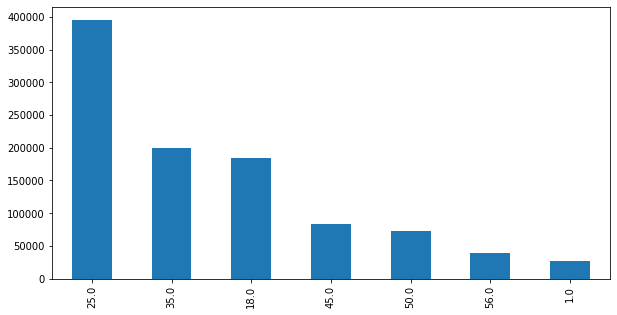

In [18]:
#Age distribution after combining into the master data set

master_data['Age'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()



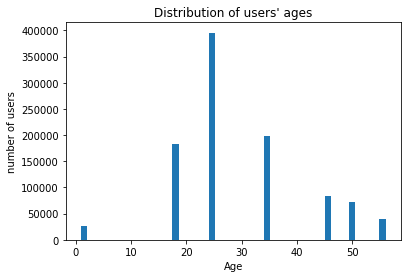

In [19]:
master_data.Age.plot.hist(bins=50)
plt.title("Distribution of users' ages")

plt.ylabel('number of users')
plt.xlabel('Age')
plt.show()

In [20]:
# the above shows the age is normally  distributed

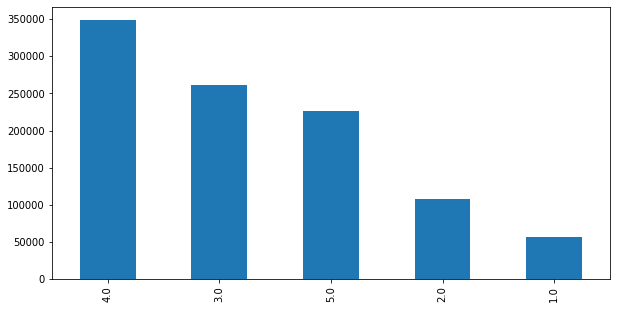

In [21]:
#Visualize overall rating by users
master_data['Rating'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

master_data.loc[master_data['Age'] ==1, 'Age Group'] = 'Under 18'
master_data.loc[master_data['Age'] ==18, 'Age Group'] = '18-24'
master_data.loc[master_data['Age'] ==25, 'Age Group'] = '25-34'
master_data.loc[master_data['Age']==35, 'Age Group'] = '35-44'
master_data.loc[master_data['Age'] ==45, 'Age Group'] = '45-49'
master_data.loc[master_data['Age'] ==50, 'Age Group'] = '50-55'
master_data.loc[master_data['Age']==56, 'Age Group'] = '56+'

Age
1.0     112
18.0    448
25.0    790
35.0    423
45.0    143
50.0    108
56.0     53
Name: MovieID, dtype: int64

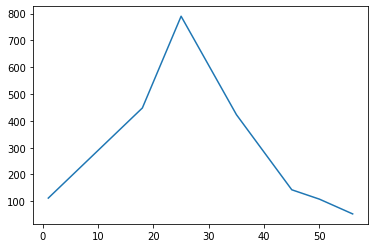

In [22]:
# visualising Age related to the movie 'Toy Story'


res = master_data[master_data.Title == "Toy Story (1995)"]

plt.plot(res.groupby("Age")["MovieID"].count())
res.groupby("Age")["MovieID"].count()

In [23]:
user_rating_toy_story = res[['UserID','Title',
            'Rating']].groupby(['Title'])['Rating'].agg(['sum','count']).reset_index()
print(user_rating_toy_story)

              Title     sum  count
0  Toy Story (1995)  8613.0   2077


In [24]:
user_rating_toy_story['Overall_Rating'] = (user_rating_toy_story['sum']/user_rating_toy_story['count']).round()
user_rating_toy_story.drop(columns='sum',axis=1,inplace=True)
user_rating_toy_story.rename(columns = {'count':'Number_of_votes'}, inplace=True)
print(user_rating_toy_story)



              Title  Number_of_votes  Overall_Rating
0  Toy Story (1995)             2077             4.0


In [25]:
#Top 25 movies by viewership rating
group_rating = master_data[['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
group_rating.rename(columns = {'count':'Number_of_votes','sum':'Total_rating'}, inplace = True)
group_rating['Overall_rating'] = (group_rating['Total_rating']/group_rating['Number_of_votes']).round()
print(group_rating.head())

                           Title  Total_rating  Number_of_votes  \
0         $1,000,000 Duck (1971)         112.0               37   
1           'Night Mother (1986)         236.0               70   
2      'Til There Was You (1997)         140.0               52   
3             'burbs, The (1989)         882.0              303   
4  ...And Justice for All (1979)         739.0              199   

   Overall_rating  
0             3.0  
1             3.0  
2             3.0  
3             3.0  
4             4.0  


In [26]:
top_25_movies = group_rating.sort_values(by=['Overall_rating','Number_of_votes'], 
                         ascending = False)[['Title','Overall_rating']].head(25).reset_index()
top_25_movies.drop(columns='index',inplace=True,axis=1)
print(top_25_movies)

                                                Title  Overall_rating
0                             Schindler's List (1993)             5.0
1                    Shawshank Redemption, The (1994)             5.0
2                               Godfather, The (1972)             5.0
3                          Usual Suspects, The (1995)             5.0
4                          Wrong Trousers, The (1993)             5.0
5                               Close Shave, A (1995)             5.0
6   Seven Samurai (The Magnificent Seven) (Shichin...             5.0
7                                      Sanjuro (1962)             5.0
8                             Apple, The (Sib) (1998)             5.0
9                                     Lamerica (1994)             5.0
10                I Am Cuba (Soy Cuba/Ya Kuba) (1964)             5.0
11                 Gate of Heavenly Peace, The (1995)             5.0
12                               Smashing Time (1967)             5.0
13                  

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,Age Group
953847,2696.0,1270,2.0,973308676.0,Back to the Future (1985),Comedy|Sci-Fi,M,25.0,7.0,24210,25-34
953848,2696.0,1097,3.0,973308690.0,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,M,25.0,7.0,24210,25-34
953849,2696.0,1617,4.0,973308842.0,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,M,25.0,7.0,24210,25-34
953850,2696.0,800,5.0,973308842.0,Lone Star (1996),Drama|Mystery,M,25.0,7.0,24210,25-34
953851,2696.0,3386,1.0,973308842.0,JFK (1991),Drama|Mystery,M,25.0,7.0,24210,25-34
953852,2696.0,3176,4.0,973308865.0,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,M,25.0,7.0,24210,25-34
953853,2696.0,1711,4.0,973308904.0,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,M,25.0,7.0,24210,25-34
953854,2696.0,1589,3.0,973308865.0,Cop Land (1997),Crime|Drama|Mystery,M,25.0,7.0,24210,25-34
953855,2696.0,1783,4.0,973308865.0,Palmetto (1998),Film-Noir|Mystery|Thriller,M,25.0,7.0,24210,25-34
953856,2696.0,1892,4.0,973308904.0,"Perfect Murder, A (1998)",Mystery|Thriller,M,25.0,7.0,24210,25-34


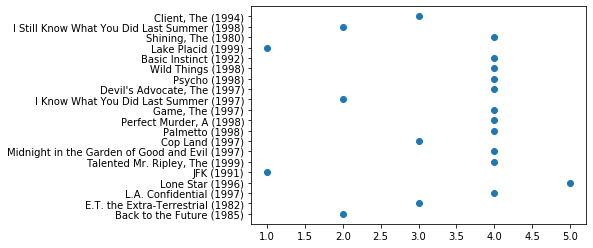

In [27]:
#ratings for all the movies reviewed by for a particular user of user id = 2696
res = master_data[master_data.UserID == 2696]

plt.scatter(y=res.Title, x=res.Rating)

res

In [28]:
# feature engineering
movie_Genres_list = master_data.Genres.tolist()
movie_genre_list = []
i = 0
while(i<len(movie_Genres_list)):
    movie_genre_list+=movie_Genres_list[i].split('|')
    i+=1
    


In [29]:
unique_genre = list(set(movie_genre_list))
print(unique_genre)
print(len(unique_genre))



['War', 'Film-Noir', 'Documentary', "Children's", 'Action', 'Animation', 'Sci-Fi', 'Romance', 'Horror', 'Comedy', 'Mystery', 'Thriller', 'Crime', 'Western', 'Musical', 'Drama', 'Adventure', 'Fantasy']
18


In [30]:
new_data = pd.concat([master_data,master_data.Genres.str.get_dummies()], axis=1)
print(new_data.columns)



Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Age Group', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [31]:
df = new_data.drop(columns=['Title','Zip-code','Timestamp','Genres'])

print(df.head())

   UserID  MovieID  Rating Gender  Age  Occupation Age Group  Action  \
0     1.0     1193     5.0      F  1.0        10.0  Under 18       0   
1     1.0      661     3.0      F  1.0        10.0  Under 18       0   
2     1.0      914     3.0      F  1.0        10.0  Under 18       0   
3     1.0     3408     4.0      F  1.0        10.0  Under 18       0   
4     1.0     2355     5.0      F  1.0        10.0  Under 18       0   

   Adventure  Animation  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0          0          0  ...        0          0       0        0        0   
1          0          1  ...        0          0       0        1        0   
2          0          0  ...        0          0       0        1        0   
3          0          0  ...        0          0       0        0        0   
4          0          1  ...        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0    0        0  
1       

In [32]:
df.Occupation.value_counts()
df.set_index('MovieID', inplace = True)

In [33]:
X = df.drop(columns=['Rating'])
Y = df['Rating']



In [34]:
X

,UserID,Gender,Age,Occupation,Age Group,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,F,1.0,10.0,Under 18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,1.0,F,1.0,10.0,Under 18,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
914,1.0,F,1.0,10.0,Under 18,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3408,1.0,F,1.0,10.0,Under 18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2355,1.0,F,1.0,10.0,Under 18,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,4211.0,M,45.0,5.0,45-49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3806,4211.0,M,45.0,5.0,45-49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3840,4211.0,M,45.0,5.0,45-49,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
Y

MovieID
1193    5.0
661     3.0
914     3.0
3408    4.0
2355    5.0
       ... 
3791    2.0
3806    3.0
3840    4.0
3766    2.0
3834    2.0
Name: Rating, Length: 1000209, dtype: float64

In [36]:
x1 = pd.get_dummies(data=X)
x2 = pd.get_dummies(X['Occupation'], prefix = 'Occupation')

In [37]:
x1

,UserID,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Western,Gender_F,Gender_M,Age Group_18-24,Age Group_25-34,Age Group_35-44,Age Group_45-49,Age Group_50-55,Age Group_56+,Age Group_Under 18
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
661,1.0,1.0,10.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
914,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3408,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2355,1.0,1.0,10.0,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,4211.0,45.0,5.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3806,4211.0,45.0,5.0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3840,4211.0,45.0,5.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [38]:
x2

,Occupation_0.0,Occupation_1.0,Occupation_2.0,Occupation_3.0,Occupation_4.0,Occupation_5.0,Occupation_6.0,Occupation_7.0,Occupation_8.0,Occupation_9.0,...,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0,Occupation_20.0
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3806,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3840,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X = pd.concat([x1,x2], axis=1)

In [40]:
X

,UserID,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0,Occupation_20.0
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,1.0,1.0,10.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3408,1.0,1.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2355,1.0,1.0,10.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,4211.0,45.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3806,4211.0,45.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3840,4211.0,45.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X.columns
X.drop(columns = ['Occupation','Gender_F','Age Group_56+','Occupation_20.0'],
       axis = 1, inplace=True)

In [42]:
X

,UserID,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Occupation_10.0,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
661,1.0,1.0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
914,1.0,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3408,1.0,1.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2355,1.0,1.0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,4211.0,45.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3806,4211.0,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3840,4211.0,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X.head()

,UserID,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Occupation_10.0,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0
MovieID,,,,,,,,,,,,,,,,,,,,,
1193,1.0,1.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
661,1.0,1.0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
914,1.0,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3408,1.0,1.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2355,1.0,1.0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
XY = pd.concat([X,Y], axis=1)
XY.head()
XY.corr()

,UserID,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0,Rating
UserID,1.000000,0.034688,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,0.003469,-0.001064,0.006572,...,-0.017747,-0.019506,-0.025539,0.020618,0.038164,0.002550,-0.001017,0.009982,-0.028945,0.012303
Age,0.034688,1.000000,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,-0.007931,0.004407,0.063856,...,0.041097,-0.008086,0.228469,-0.006463,-0.001245,0.120101,0.049327,0.023818,-0.064772,0.056869
Action,-0.002023,-0.030975,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,-0.052565,-0.202415,...,-0.008057,0.023721,-0.015068,0.009717,0.008802,0.000186,0.040320,0.001612,-0.002460,-0.047633
Adventure,-0.000683,-0.016730,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,-0.194570,...,-0.003949,0.017566,-0.005647,-0.000529,0.007397,-0.001813,0.024713,0.004900,-0.002423,-0.036718
Animation,-0.007665,-0.047020,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,-0.154479,...,-0.005680,0.004814,-0.011278,-0.008746,0.001037,-0.008887,0.002122,-0.006706,-0.004100,0.019670
Children's,-0.004862,-0.052858,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,-0.135707,...,-0.007489,-0.003746,-0.011832,-0.011859,-0.001971,-0.011182,0.000086,-0.003828,-0.000690,-0.039829
Comedy,-0.003651,-0.044046,-0.268092,-0.124960,0.018544,0.058711,1.000000,-0.078030,-0.040697,-0.249840,...,0.002871,-0.006293,-0.010098,0.003771,-0.005732,-0.006175,-0.011291,-0.002612,0.002544,-0.039622
Crime,0.003469,-0.007931,0.088519,-0.045924,-0.062520,-0.081977,-0.078030,1.000000,-0.026243,0.070479,...,0.004160,-0.001462,-0.003452,0.008152,-0.001139,-0.000702,0.001228,0.002295,0.000359,0.033446
Documentary,-0.001064,0.004407,-0.052565,-0.035109,-0.018991,-0.024901,-0.040697,-0.026243,1.000000,-0.062194,...,0.002257,-0.002647,-0.000656,-0.004407,-0.001621,0.003074,-0.008813,-0.002126,0.001317,0.028098
Drama,0.006572,0.063856,-0.202415,-0.194570,-0.154479,-0.135707,-0.249840,0.070479,-0.062194,1.000000,...,0.008003,-0.015352,0.021695,0.000184,0.002930,0.001762,-0.023828,-0.011343,-0.005896,0.122561


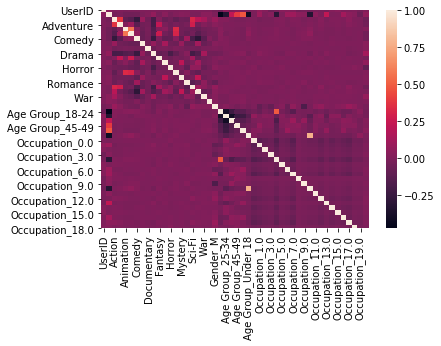

In [45]:
sns.heatmap(XY.corr())


In [46]:
X = X[1000:].values
Y = Y[1000:].values
train, test, train_labels, test_labels = train_test_split(X,Y,test_size=0.33,random_state=42)

In [47]:
#applying decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)

# accuracy on test
Y_pred = decision_tree.predict(test)
acc_decision_tree = accuracy_score(test_labels, Y_pred)*100

print(acc_decision_tree)

35.0443835882319


In [48]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(train, train_labels) 
Y_pred = gnb.predict(test) 
  
# accuracy on test
accuracy = gnb.score(test, test_labels)  

from sklearn.metrics import confusion_matrix
  
# creating a confusion matrix 
cm = confusion_matrix(test_labels, Y_pred) 

accuracy


0.2685821210108601

In [50]:
#Knn 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(train, train_labels) 
knn_predictions = knn.predict(test)   
    
# accuracy on test
accuracy = knn.score(test, test_labels) 

  
# creating a confusion matrix 

cm = confusion_matrix(test_labels, knn_predictions) 

accuracy

0.3626929177319031

In [51]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
# accuracy on test
acc_random_forest = accuracy_score(test_labels, Y_pred)*100
print(acc_random_forest)

35.89232696162723
